In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
num_classes = 10
batch_size = 100
epochs = 10
stats = []

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [7]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001))

In [8]:
for n in range(epochs):
    for i in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[i:(i + batch_size)]
        y_batch = y_train[i:(i + batch_size)]

        # predict class probabilities
        y_pred = model.predict(x_batch)

        # sample from those probabilities
        y_sample = np.empty((batch_size,), dtype=np.integer)
        for j, p in enumerate(y_pred):
            y_sample[j] = np.random.choice(num_classes, p=p)

        # calculate accuracy for logging
        y_pred = np.argmax(y_pred, axis=1)
        accuracy = np.mean(y_pred == y_batch)

        # calculate reward and advantage, update baseline
        reward = (y_sample == y_batch)

        # train with samples as targets and advantage as sample weight
        loss = model.train_on_batch(x_batch, y_sample, sample_weight = reward)

        # log statistics
        stats.append((loss, accuracy, np.mean(reward)))
        print(i, loss, accuracy, np.mean(reward))

(0, 2.2964718, 0.14000000000000001, 0.059999999999999998)
(100, 2.3447208, 0.10000000000000001, 0.089999999999999997)
(200, 1.7881333, 0.13, 0.089999999999999997)
(300, 2.0594254, 0.070000000000000007, 0.12)
(400, 2.3400233, 0.14999999999999999, 0.089999999999999997)
(500, 1.5023084, 0.11, 0.10000000000000001)
(600, 1.8434854, 0.14000000000000001, 0.11)
(700, 1.6822593, 0.10000000000000001, 0.14999999999999999)
(800, 1.1700689, 0.22, 0.23000000000000001)
(900, 1.311159, 0.25, 0.25)
(1000, 1.593982, 0.33000000000000002, 0.25)
(1100, 1.0072888, 0.29999999999999999, 0.23999999999999999)
(1200, 1.1342685, 0.28000000000000003, 0.20999999999999999)
(1300, 1.1267807, 0.33000000000000002, 0.28000000000000003)
(1400, 0.57430857, 0.39000000000000001, 0.22)
(1500, 0.60566872, 0.32000000000000001, 0.23999999999999999)
(1600, 0.46365425, 0.40999999999999998, 0.34000000000000002)
(1700, 0.53999311, 0.34000000000000002, 0.32000000000000001)
(1800, 0.47561669, 0.46999999999999997, 0.38)
(1900, 0.45847

(14500, 0.16130552, 0.59999999999999998, 0.58999999999999997)
(14600, 0.097228311, 0.51000000000000001, 0.5)
(14700, 0.029644929, 0.48999999999999999, 0.46999999999999997)
(14800, 0.040117759, 0.48999999999999999, 0.47999999999999998)
(14900, 0.05768365, 0.56000000000000005, 0.56000000000000005)
(15000, 0.14113091, 0.60999999999999999, 0.59999999999999998)
(15100, 0.21660745, 0.47999999999999998, 0.46999999999999997)
(15200, 0.07323128, 0.55000000000000004, 0.55000000000000004)
(15300, 0.016264513, 0.59999999999999998, 0.58999999999999997)
(15400, 0.21343955, 0.60999999999999999, 0.62)
(15500, 0.027679505, 0.48999999999999999, 0.47999999999999998)
(15600, 0.026380444, 0.51000000000000001, 0.5)
(15700, 0.090704747, 0.5, 0.46999999999999997)
(15800, 0.044009019, 0.56000000000000005, 0.54000000000000004)
(15900, 0.060557418, 0.56999999999999995, 0.56999999999999995)
(16000, 0.05471598, 0.48999999999999999, 0.47999999999999998)
(16100, 0.14755571, 0.46000000000000002, 0.46000000000000002)


(28500, 0.022654856, 0.59999999999999998, 0.59999999999999998)
(28600, 0.050769664, 0.56999999999999995, 0.55000000000000004)
(28700, 0.064293586, 0.57999999999999996, 0.57999999999999996)
(28800, 0.043693714, 0.60999999999999999, 0.59999999999999998)
(28900, 0.053347245, 0.59999999999999998, 0.58999999999999997)
(29000, 0.11309945, 0.53000000000000003, 0.52000000000000002)
(29100, 0.034572676, 0.48999999999999999, 0.47999999999999998)
(29200, 0.11520876, 0.59999999999999998, 0.60999999999999999)
(29300, 0.018176148, 0.56999999999999995, 0.56999999999999995)
(29400, 0.012394611, 0.53000000000000003, 0.52000000000000002)
(29500, 0.00330104, 0.60999999999999999, 0.59999999999999998)
(29600, 0.046585426, 0.58999999999999997, 0.59999999999999998)
(29700, 0.094285689, 0.57999999999999996, 0.55000000000000004)
(29800, 0.17392388, 0.54000000000000004, 0.56000000000000005)
(29900, 0.018329524, 0.59999999999999998, 0.59999999999999998)
(30000, 0.0082217865, 0.57999999999999996, 0.54000000000000

(42400, 0.034256939, 0.68000000000000005, 0.68000000000000005)
(42500, 0.10448848, 0.68000000000000005, 0.68999999999999995)
(42600, 0.054093495, 0.68999999999999995, 0.68999999999999995)
(42700, 0.023957642, 0.66000000000000003, 0.65000000000000002)
(42800, 0.027647631, 0.57999999999999996, 0.58999999999999997)
(42900, 0.10376416, 0.67000000000000004, 0.67000000000000004)
(43000, 0.18377779, 0.64000000000000001, 0.65000000000000002)
(43100, 0.048953164, 0.62, 0.60999999999999999)
(43200, 0.09186326, 0.68999999999999995, 0.68999999999999995)
(43300, 0.026885938, 0.72999999999999998, 0.72999999999999998)
(43400, 0.025109446, 0.66000000000000003, 0.65000000000000002)
(43500, 0.16267177, 0.68000000000000005, 0.68999999999999995)
(43600, 0.040146831, 0.72999999999999998, 0.72999999999999998)
(43700, 0.10682941, 0.73999999999999999, 0.75)
(43800, 0.019136416, 0.63, 0.63)
(43900, 0.067253374, 0.68999999999999995, 0.68999999999999995)
(44000, 0.049173411, 0.58999999999999997, 0.57999999999999

(56300, 0.050224643, 0.72999999999999998, 0.69999999999999996)
(56400, 0.034584798, 0.62, 0.60999999999999999)
(56500, 0.0045839371, 0.73999999999999999, 0.72999999999999998)
(56600, 0.027582822, 0.68999999999999995, 0.68000000000000005)
(56700, 0.021361627, 0.65000000000000002, 0.64000000000000001)
(56800, 0.045655467, 0.75, 0.76000000000000001)
(56900, 0.028683392, 0.68000000000000005, 0.68000000000000005)
(57000, 0.07228341, 0.68000000000000005, 0.68999999999999995)
(57100, 0.038487375, 0.70999999999999996, 0.70999999999999996)
(57200, 0.12066361, 0.68000000000000005, 0.67000000000000004)
(57300, 0.10412487, 0.68000000000000005, 0.67000000000000004)
(57400, 0.01287232, 0.68999999999999995, 0.68000000000000005)
(57500, 0.010486321, 0.70999999999999996, 0.69999999999999996)
(57600, 0.020042021, 0.58999999999999997, 0.58999999999999997)
(57700, 0.099797755, 0.67000000000000004, 0.67000000000000004)
(57800, 0.081197634, 0.73999999999999999, 0.75)
(57900, 0.018467855, 0.70999999999999996

(10300, 0.055296928, 0.68000000000000005, 0.68000000000000005)
(10400, 0.012971432, 0.70999999999999996, 0.70999999999999996)
(10500, 0.030725474, 0.69999999999999996, 0.69999999999999996)
(10600, 0.0059953369, 0.73999999999999999, 0.73999999999999999)
(10700, 0.002753526, 0.68000000000000005, 0.68000000000000005)
(10800, 0.052201845, 0.70999999999999996, 0.70999999999999996)
(10900, 0.022551052, 0.69999999999999996, 0.69999999999999996)
(11000, 0.0015553469, 0.62, 0.62)
(11100, 0.020192953, 0.72999999999999998, 0.72999999999999998)
(11200, 0.068402603, 0.65000000000000002, 0.65000000000000002)
(11300, 0.0042248499, 0.66000000000000003, 0.66000000000000003)
(11400, 0.047419503, 0.70999999999999996, 0.69999999999999996)
(11500, 0.0096146828, 0.67000000000000004, 0.66000000000000003)
(11600, 0.11962678, 0.67000000000000004, 0.67000000000000004)
(11700, 0.085176378, 0.65000000000000002, 0.66000000000000003)
(11800, 0.027404275, 0.64000000000000001, 0.64000000000000001)
(11900, 0.03397977,

(24100, 0.038683526, 0.76000000000000001, 0.73999999999999999)
(24200, 0.039702136, 0.76000000000000001, 0.72999999999999998)
(24300, 0.0023673919, 0.71999999999999997, 0.71999999999999997)
(24400, 0.11172891, 0.64000000000000001, 0.64000000000000001)
(24500, 0.062104333, 0.70999999999999996, 0.69999999999999996)
(24600, 0.067840032, 0.67000000000000004, 0.67000000000000004)
(24700, 0.060973626, 0.71999999999999997, 0.71999999999999997)
(24800, 0.068663664, 0.66000000000000003, 0.66000000000000003)
(24900, 0.089874439, 0.65000000000000002, 0.65000000000000002)
(25000, 0.0068972381, 0.75, 0.75)
(25100, 0.0099937841, 0.77000000000000002, 0.77000000000000002)
(25200, 0.076682471, 0.63, 0.64000000000000001)
(25300, 0.16588822, 0.69999999999999996, 0.69999999999999996)
(25400, 0.02010045, 0.73999999999999999, 0.73999999999999999)
(25500, 0.062828436, 0.66000000000000003, 0.65000000000000002)
(25600, 0.0059570908, 0.68000000000000005, 0.67000000000000004)
(25700, 0.036739424, 0.7600000000000

(37900, 0.027708605, 0.63, 0.63)
(38000, 0.027518129, 0.66000000000000003, 0.66000000000000003)
(38100, 0.024622373, 0.64000000000000001, 0.64000000000000001)
(38200, 0.0052508279, 0.72999999999999998, 0.72999999999999998)
(38300, 0.022876443, 0.71999999999999997, 0.71999999999999997)
(38400, 0.00046039317, 0.67000000000000004, 0.67000000000000004)
(38500, 0.017902531, 0.72999999999999998, 0.73999999999999999)
(38600, 0.017146382, 0.66000000000000003, 0.66000000000000003)
(38700, 0.023572709, 0.70999999999999996, 0.70999999999999996)
(38800, 0.017478425, 0.72999999999999998, 0.72999999999999998)
(38900, 0.10476161, 0.71999999999999997, 0.72999999999999998)
(39000, 0.0063130991, 0.68000000000000005, 0.68000000000000005)
(39100, 0.024821291, 0.69999999999999996, 0.69999999999999996)
(39200, 0.027392931, 0.70999999999999996, 0.70999999999999996)
(39300, 0.025172012, 0.69999999999999996, 0.68999999999999995)
(39400, 0.01509488, 0.68999999999999995, 0.68000000000000005)
(39500, 0.0006183278

(51400, 0.0089422856, 0.76000000000000001, 0.76000000000000001)
(51500, 0.0088614328, 0.59999999999999998, 0.60999999999999999)
(51600, 0.0028319515, 0.70999999999999996, 0.70999999999999996)
(51700, 0.0136042, 0.68999999999999995, 0.68999999999999995)
(51800, 0.015172991, 0.69999999999999996, 0.69999999999999996)
(51900, 0.080291793, 0.69999999999999996, 0.68999999999999995)
(52000, 0.058022056, 0.69999999999999996, 0.69999999999999996)
(52100, 0.022557534, 0.67000000000000004, 0.67000000000000004)
(52200, 0.036935702, 0.68999999999999995, 0.68999999999999995)
(52300, 0.012046285, 0.66000000000000003, 0.66000000000000003)
(52400, 0.017250761, 0.75, 0.75)
(52500, 0.0029555818, 0.68999999999999995, 0.68999999999999995)
(52600, 0.021667069, 0.63, 0.59999999999999998)
(52700, 0.039110247, 0.72999999999999998, 0.72999999999999998)
(52800, 0.15937229, 0.64000000000000001, 0.65000000000000002)
(52900, 0.0031909978, 0.68999999999999995, 0.68999999999999995)
(53000, 0.0065391972, 0.69999999999

(5400, 0.026711913, 0.71999999999999997, 0.71999999999999997)
(5500, 0.15469396, 0.67000000000000004, 0.68000000000000005)
(5600, 0.021377213, 0.68999999999999995, 0.68999999999999995)
(5700, 0.05546622, 0.68999999999999995, 0.69999999999999996)
(5800, 0.0070507778, 0.65000000000000002, 0.64000000000000001)
(5900, 0.0063728835, 0.68999999999999995, 0.68999999999999995)
(6000, 0.00082125433, 0.66000000000000003, 0.66000000000000003)
(6100, 0.026076209, 0.68000000000000005, 0.68000000000000005)
(6200, 0.01552581, 0.71999999999999997, 0.71999999999999997)
(6300, 0.012655994, 0.68000000000000005, 0.68000000000000005)
(6400, 0.051825713, 0.70999999999999996, 0.70999999999999996)
(6500, 0.0016087939, 0.81000000000000005, 0.80000000000000004)
(6600, 0.0026930943, 0.64000000000000001, 0.64000000000000001)
(6700, 0.013739356, 0.70999999999999996, 0.70999999999999996)
(6800, 0.037552498, 0.71999999999999997, 0.70999999999999996)
(6900, 0.11491392, 0.66000000000000003, 0.67000000000000004)
(7000,

(19200, 0.015583344, 0.71999999999999997, 0.71999999999999997)
(19300, 0.0032123686, 0.72999999999999998, 0.72999999999999998)
(19400, 0.0018278626, 0.71999999999999997, 0.71999999999999997)
(19500, 0.16307886, 0.60999999999999999, 0.63)
(19600, 0.017789587, 0.69999999999999996, 0.69999999999999996)
(19700, 0.013789716, 0.62, 0.62)
(19800, 0.0028332316, 0.68000000000000005, 0.68000000000000005)
(19900, 0.010390168, 0.69999999999999996, 0.69999999999999996)
(20000, 0.028191941, 0.69999999999999996, 0.68999999999999995)
(20100, 0.0082784891, 0.68999999999999995, 0.68999999999999995)
(20200, 0.049071342, 0.68000000000000005, 0.68999999999999995)
(20300, 0.017693061, 0.70999999999999996, 0.70999999999999996)
(20400, 0.024807405, 0.64000000000000001, 0.64000000000000001)
(20500, 0.043058686, 0.66000000000000003, 0.66000000000000003)
(20600, 0.018046496, 0.65000000000000002, 0.64000000000000001)
(20700, 0.077820405, 0.68000000000000005, 0.68000000000000005)
(20800, 0.013561206, 0.68999999999

(32900, 0.0045892205, 0.76000000000000001, 0.76000000000000001)
(33000, 0.1309783, 0.80000000000000004, 0.80000000000000004)
(33100, 0.034667816, 0.79000000000000004, 0.79000000000000004)
(33200, 0.037570164, 0.72999999999999998, 0.73999999999999999)
(33300, 0.11747462, 0.77000000000000002, 0.77000000000000002)
(33400, 0.054363415, 0.83999999999999997, 0.83999999999999997)
(33500, 0.032916985, 0.83999999999999997, 0.81999999999999995)
(33600, 0.060562804, 0.75, 0.75)
(33700, 0.0021773048, 0.78000000000000003, 0.77000000000000002)
(33800, 0.008040891, 0.81999999999999995, 0.81999999999999995)
(33900, 0.010246907, 0.81999999999999995, 0.81000000000000005)
(34000, 0.04383133, 0.84999999999999998, 0.84999999999999998)
(34100, 0.013448291, 0.77000000000000002, 0.78000000000000003)
(34200, 0.014234972, 0.79000000000000004, 0.79000000000000004)
(34300, 0.058356542, 0.77000000000000002, 0.79000000000000004)
(34400, 0.013480075, 0.70999999999999996, 0.69999999999999996)
(34500, 0.10469583, 0.82

(46400, 0.067601085, 0.80000000000000004, 0.80000000000000004)
(46500, 0.0035451532, 0.80000000000000004, 0.79000000000000004)
(46600, 0.015495273, 0.81999999999999995, 0.81000000000000005)
(46700, 0.04214903, 0.81000000000000005, 0.80000000000000004)
(46800, 0.14828217, 0.80000000000000004, 0.81000000000000005)
(46900, 0.062064238, 0.76000000000000001, 0.76000000000000001)
(47000, 0.074372694, 0.82999999999999996, 0.83999999999999997)
(47100, 0.011385786, 0.73999999999999999, 0.73999999999999999)
(47200, 0.068832807, 0.76000000000000001, 0.73999999999999999)
(47300, 0.0083169499, 0.80000000000000004, 0.81000000000000005)
(47400, 0.02466147, 0.82999999999999996, 0.81999999999999995)
(47500, 0.098317347, 0.79000000000000004, 0.79000000000000004)
(47600, 0.058625098, 0.77000000000000002, 0.76000000000000001)
(47700, 0.015503495, 0.81000000000000005, 0.81000000000000005)
(47800, 0.018439824, 0.78000000000000003, 0.78000000000000003)
(47900, 0.011367459, 0.78000000000000003, 0.790000000000

(59800, 0.0024204871, 0.78000000000000003, 0.78000000000000003)
(59900, 0.037229933, 0.80000000000000004, 0.80000000000000004)
(0, 0.0036521321, 0.82999999999999996, 0.82999999999999996)
(100, 0.003328182, 0.71999999999999997, 0.70999999999999996)
(200, 0.037162282, 0.81999999999999995, 0.81999999999999995)
(300, 0.079634242, 0.72999999999999998, 0.71999999999999997)
(400, 0.077449821, 0.77000000000000002, 0.77000000000000002)
(500, 0.012680698, 0.77000000000000002, 0.77000000000000002)
(600, 0.05383639, 0.81000000000000005, 0.80000000000000004)
(700, 0.013287072, 0.82999999999999996, 0.82999999999999996)
(800, 0.018637544, 0.79000000000000004, 0.77000000000000002)
(900, 0.061551914, 0.84999999999999998, 0.84999999999999998)
(1000, 0.028288191, 0.80000000000000004, 0.80000000000000004)
(1100, 0.0096870521, 0.76000000000000001, 0.73999999999999999)
(1200, 0.072025388, 0.78000000000000003, 0.78000000000000003)
(1300, 0.069373034, 0.76000000000000001, 0.77000000000000002)
(1400, 0.0017115

(13600, 0.032090228, 0.76000000000000001, 0.76000000000000001)
(13700, 0.030195313, 0.78000000000000003, 0.79000000000000004)
(13800, 0.021575846, 0.81999999999999995, 0.81999999999999995)
(13900, 0.042597242, 0.73999999999999999, 0.73999999999999999)
(14000, 0.067759782, 0.79000000000000004, 0.79000000000000004)
(14100, 0.050672852, 0.79000000000000004, 0.79000000000000004)
(14200, 0.0043717162, 0.79000000000000004, 0.79000000000000004)
(14300, 0.068125919, 0.72999999999999998, 0.73999999999999999)
(14400, 0.0061939396, 0.81999999999999995, 0.81999999999999995)
(14500, 0.021396158, 0.81999999999999995, 0.81999999999999995)
(14600, 0.027397728, 0.82999999999999996, 0.81999999999999995)
(14700, 0.041340269, 0.81000000000000005, 0.81000000000000005)
(14800, 0.018581862, 0.72999999999999998, 0.72999999999999998)
(14900, 0.0088558542, 0.77000000000000002, 0.77000000000000002)
(15000, 0.031506814, 0.81000000000000005, 0.81000000000000005)
(15100, 0.054004088, 0.77000000000000002, 0.77000000

(27000, 0.00084283622, 0.85999999999999999, 0.84999999999999998)
(27100, 0.047881011, 0.72999999999999998, 0.72999999999999998)
(27200, 0.022078721, 0.81000000000000005, 0.80000000000000004)
(27300, 0.067310587, 0.77000000000000002, 0.76000000000000001)
(27400, 0.025265841, 0.80000000000000004, 0.80000000000000004)
(27500, 0.021993177, 0.81000000000000005, 0.80000000000000004)
(27600, 0.062337495, 0.76000000000000001, 0.76000000000000001)
(27700, 0.0085747717, 0.69999999999999996, 0.68999999999999995)
(27800, 0.01252401, 0.76000000000000001, 0.76000000000000001)
(27900, 0.011261165, 0.82999999999999996, 0.82999999999999996)
(28000, 0.0074406578, 0.78000000000000003, 0.78000000000000003)
(28100, 0.060221419, 0.76000000000000001, 0.78000000000000003)
(28200, 0.034510307, 0.71999999999999997, 0.71999999999999997)
(28300, 0.039856318, 0.78000000000000003, 0.78000000000000003)
(28400, 0.023850909, 0.82999999999999996, 0.81999999999999995)
(28500, 0.026658792, 0.78000000000000003, 0.78000000

(40400, 0.0074913828, 0.79000000000000004, 0.78000000000000003)
(40500, 0.0093235774, 0.77000000000000002, 0.77000000000000002)
(40600, 0.010204271, 0.80000000000000004, 0.80000000000000004)
(40700, 0.047595549, 0.83999999999999997, 0.83999999999999997)
(40800, 0.038000036, 0.77000000000000002, 0.78000000000000003)
(40900, 0.031125326, 0.78000000000000003, 0.79000000000000004)
(41000, 0.094235159, 0.80000000000000004, 0.81000000000000005)
(41100, 0.0122185, 0.78000000000000003, 0.77000000000000002)
(41200, 0.042793866, 0.75, 0.73999999999999999)
(41300, 0.098627694, 0.77000000000000002, 0.77000000000000002)
(41400, 0.037033726, 0.77000000000000002, 0.76000000000000001)
(41500, 0.023577113, 0.80000000000000004, 0.80000000000000004)
(41600, 0.039702274, 0.85999999999999999, 0.84999999999999998)
(41700, 0.016242666, 0.78000000000000003, 0.78000000000000003)
(41800, 0.0022476343, 0.80000000000000004, 0.80000000000000004)
(41900, 0.063776165, 0.75, 0.75)
(42000, 0.01113765, 0.79000000000000

(53800, 0.04875711, 0.77000000000000002, 0.77000000000000002)
(53900, 0.015876384, 0.81000000000000005, 0.81000000000000005)
(54000, 0.011828827, 0.75, 0.75)
(54100, 0.012580796, 0.81000000000000005, 0.81000000000000005)
(54200, 0.00072894874, 0.81000000000000005, 0.80000000000000004)
(54300, 0.004310987, 0.75, 0.75)
(54400, 0.0048643611, 0.85999999999999999, 0.84999999999999998)
(54500, 0.0020206505, 0.73999999999999999, 0.72999999999999998)
(54600, 0.014786572, 0.83999999999999997, 0.83999999999999997)
(54700, 0.0033544698, 0.79000000000000004, 0.79000000000000004)
(54800, 0.0099508008, 0.79000000000000004, 0.80000000000000004)
(54900, 0.0071546608, 0.82999999999999996, 0.82999999999999996)
(55000, 0.015998295, 0.81000000000000005, 0.80000000000000004)
(55100, 0.040194068, 0.79000000000000004, 0.79000000000000004)
(55200, 0.061673783, 0.81999999999999995, 0.81999999999999995)
(55300, 0.0017674231, 0.79000000000000004, 0.79000000000000004)
(55400, 0.0023168812, 0.81999999999999995, 0.

(7200, 0.028586436, 0.75, 0.75)
(7300, 0.028683748, 0.81999999999999995, 0.81999999999999995)
(7400, 0.0054918202, 0.80000000000000004, 0.80000000000000004)
(7500, 0.042857751, 0.79000000000000004, 0.79000000000000004)
(7600, 0.0063952561, 0.76000000000000001, 0.76000000000000001)
(7700, 0.039397817, 0.71999999999999997, 0.71999999999999997)
(7800, 0.0786248, 0.80000000000000004, 0.80000000000000004)
(7900, 0.031777803, 0.80000000000000004, 0.80000000000000004)
(8000, 0.0096111074, 0.81000000000000005, 0.81000000000000005)
(8100, 0.022035008, 0.89000000000000001, 0.89000000000000001)
(8200, 0.058336802, 0.79000000000000004, 0.79000000000000004)
(8300, 0.014182073, 0.81000000000000005, 0.81999999999999995)
(8400, 0.13570935, 0.69999999999999996, 0.69999999999999996)
(8500, 0.004522257, 0.78000000000000003, 0.78000000000000003)
(8600, 0.038607553, 0.77000000000000002, 0.77000000000000002)
(8700, 0.11453842, 0.80000000000000004, 0.80000000000000004)
(8800, 0.052549023, 0.81000000000000005

(20700, 0.0087065129, 0.76000000000000001, 0.76000000000000001)
(20800, 0.005972683, 0.80000000000000004, 0.80000000000000004)
(20900, 0.0050484301, 0.78000000000000003, 0.77000000000000002)
(21000, 0.00076877122, 0.79000000000000004, 0.79000000000000004)
(21100, 0.041815024, 0.81000000000000005, 0.81000000000000005)
(21200, 0.020143146, 0.84999999999999998, 0.84999999999999998)
(21300, 0.032949019, 0.81999999999999995, 0.81999999999999995)
(21400, 0.0061169625, 0.80000000000000004, 0.80000000000000004)
(21500, 0.00061430165, 0.73999999999999999, 0.73999999999999999)
(21600, 0.0025807219, 0.76000000000000001, 0.76000000000000001)
(21700, 0.017584994, 0.80000000000000004, 0.80000000000000004)
(21800, 0.029706519, 0.78000000000000003, 0.77000000000000002)
(21900, 0.005699601, 0.87, 0.87)
(22000, 0.0033529138, 0.76000000000000001, 0.76000000000000001)
(22100, 0.041577183, 0.70999999999999996, 0.70999999999999996)
(22200, 0.0044078184, 0.73999999999999999, 0.73999999999999999)
(22300, 0.00

(34100, 0.01289933, 0.79000000000000004, 0.79000000000000004)
(34200, 0.006433689, 0.80000000000000004, 0.80000000000000004)
(34300, 0.0096082399, 0.80000000000000004, 0.80000000000000004)
(34400, 0.079692051, 0.72999999999999998, 0.72999999999999998)
(34500, 0.028956773, 0.87, 0.87)
(34600, 0.0044948487, 0.75, 0.73999999999999999)
(34700, 0.0097039249, 0.77000000000000002, 0.77000000000000002)
(34800, 0.019005824, 0.75, 0.75)
(34900, 0.0018905103, 0.80000000000000004, 0.80000000000000004)
(35000, 0.0059512281, 0.72999999999999998, 0.72999999999999998)
(35100, 0.0012939423, 0.73999999999999999, 0.73999999999999999)
(35200, 0.0032269794, 0.78000000000000003, 0.78000000000000003)
(35300, 0.0041313753, 0.78000000000000003, 0.77000000000000002)
(35400, 0.019070428, 0.76000000000000001, 0.76000000000000001)
(35500, 0.019551016, 0.83999999999999997, 0.83999999999999997)
(35600, 0.12821305, 0.73999999999999999, 0.72999999999999998)
(35700, 0.026270645, 0.83999999999999997, 0.83999999999999997

(47600, 0.039062966, 0.77000000000000002, 0.77000000000000002)
(47700, 0.0058297301, 0.81000000000000005, 0.81000000000000005)
(47800, 0.056671094, 0.78000000000000003, 0.78000000000000003)
(47900, 0.010469846, 0.79000000000000004, 0.79000000000000004)
(48000, 0.035429455, 0.82999999999999996, 0.82999999999999996)
(48100, 0.0074336138, 0.82999999999999996, 0.81999999999999995)
(48200, 0.015309186, 0.73999999999999999, 0.72999999999999998)
(48300, 0.0049654189, 0.81999999999999995, 0.81999999999999995)
(48400, 0.0024087699, 0.81999999999999995, 0.81999999999999995)
(48500, 0.0089390362, 0.78000000000000003, 0.78000000000000003)
(48600, 0.0042932122, 0.81000000000000005, 0.81000000000000005)
(48700, 0.027571507, 0.82999999999999996, 0.82999999999999996)
(48800, 0.0025116175, 0.79000000000000004, 0.79000000000000004)
(48900, 0.035323299, 0.78000000000000003, 0.78000000000000003)
(49000, 0.088030741, 0.80000000000000004, 0.80000000000000004)
(49100, 0.0049758223, 0.79000000000000004, 0.790

(1000, 0.021583546, 0.81000000000000005, 0.79000000000000004)
(1100, 0.039724112, 0.76000000000000001, 0.75)
(1200, 0.0289976, 0.79000000000000004, 0.80000000000000004)
(1300, 0.0031554752, 0.76000000000000001, 0.76000000000000001)
(1400, 0.00034622385, 0.82999999999999996, 0.82999999999999996)
(1500, 0.0034899893, 0.77000000000000002, 0.77000000000000002)
(1600, 0.0018735428, 0.78000000000000003, 0.78000000000000003)
(1700, 0.008768932, 0.78000000000000003, 0.78000000000000003)
(1800, 0.040657584, 0.79000000000000004, 0.79000000000000004)
(1900, 0.0037122739, 0.77000000000000002, 0.77000000000000002)
(2000, 0.0064068558, 0.82999999999999996, 0.81999999999999995)
(2100, 0.0017442961, 0.88, 0.88)
(2200, 0.0044402401, 0.80000000000000004, 0.80000000000000004)
(2300, 0.0037592971, 0.78000000000000003, 0.78000000000000003)
(2400, 0.027146885, 0.83999999999999997, 0.83999999999999997)
(2500, 0.01550318, 0.81000000000000005, 0.81000000000000005)
(2600, 0.0030920762, 0.80000000000000004, 0.80

(14600, 0.015249516, 0.83999999999999997, 0.83999999999999997)
(14700, 0.0035395802, 0.81000000000000005, 0.81000000000000005)
(14800, 0.047095977, 0.72999999999999998, 0.72999999999999998)
(14900, 0.0042944383, 0.77000000000000002, 0.77000000000000002)
(15000, 0.00033799474, 0.81000000000000005, 0.81000000000000005)
(15100, 0.088168658, 0.77000000000000002, 0.77000000000000002)
(15200, 0.010693545, 0.79000000000000004, 0.79000000000000004)
(15300, 0.011291394, 0.79000000000000004, 0.80000000000000004)
(15400, 0.037767876, 0.81999999999999995, 0.81999999999999995)
(15500, 0.010288378, 0.81000000000000005, 0.81000000000000005)
(15600, 0.03940472, 0.76000000000000001, 0.76000000000000001)
(15700, 0.051033296, 0.83999999999999997, 0.83999999999999997)
(15800, 0.0067395628, 0.81999999999999995, 0.81999999999999995)
(15900, 0.0044644983, 0.82999999999999996, 0.82999999999999996)
(16000, 0.062950827, 0.73999999999999999, 0.73999999999999999)
(16100, 0.058219668, 0.73999999999999999, 0.75)
(1

(27800, 0.057258464, 0.76000000000000001, 0.76000000000000001)
(27900, 0.0007054109, 0.82999999999999996, 0.82999999999999996)
(28000, 0.013861507, 0.78000000000000003, 0.78000000000000003)
(28100, 0.022844229, 0.77000000000000002, 0.77000000000000002)
(28200, 4.6899142e-05, 0.72999999999999998, 0.72999999999999998)
(28300, 0.0038309395, 0.79000000000000004, 0.79000000000000004)
(28400, 0.016779024, 0.82999999999999996, 0.82999999999999996)
(28500, 0.0014878935, 0.78000000000000003, 0.78000000000000003)
(28600, 0.016114241, 0.79000000000000004, 0.78000000000000003)
(28700, 0.0043405709, 0.80000000000000004, 0.80000000000000004)
(28800, 0.0006237799, 0.82999999999999996, 0.82999999999999996)
(28900, 0.002190049, 0.81999999999999995, 0.81999999999999995)
(29000, 0.071675077, 0.72999999999999998, 0.71999999999999997)
(29100, 0.019031703, 0.79000000000000004, 0.79000000000000004)
(29200, 0.01413766, 0.82999999999999996, 0.82999999999999996)
(29300, 0.010635903, 0.80000000000000004, 0.78000

(41300, 0.019096043, 0.77000000000000002, 0.77000000000000002)
(41400, 0.073395208, 0.77000000000000002, 0.78000000000000003)
(41500, 0.028846122, 0.81000000000000005, 0.81000000000000005)
(41600, 0.02046356, 0.84999999999999998, 0.84999999999999998)
(41700, 0.035137292, 0.78000000000000003, 0.79000000000000004)
(41800, 0.013325924, 0.81000000000000005, 0.81000000000000005)
(41900, 0.0025025404, 0.75, 0.75)
(42000, 0.044321191, 0.80000000000000004, 0.80000000000000004)
(42100, 0.047838941, 0.79000000000000004, 0.79000000000000004)
(42200, 0.019176021, 0.81000000000000005, 0.79000000000000004)
(42300, 0.027829841, 0.75, 0.75)
(42400, 0.0017859846, 0.78000000000000003, 0.78000000000000003)
(42500, 0.044904269, 0.73999999999999999, 0.73999999999999999)
(42600, 0.026287081, 0.81999999999999995, 0.81999999999999995)
(42700, 0.023295507, 0.79000000000000004, 0.78000000000000003)
(42800, 0.0019520265, 0.70999999999999996, 0.70999999999999996)
(42900, 0.021789165, 0.81000000000000005, 0.800000

(54900, 0.0057416535, 0.82999999999999996, 0.82999999999999996)
(55000, 0.0013264384, 0.81000000000000005, 0.81000000000000005)
(55100, 0.0083566671, 0.79000000000000004, 0.79000000000000004)
(55200, 0.042089276, 0.82999999999999996, 0.82999999999999996)
(55300, 0.039615899, 0.79000000000000004, 0.79000000000000004)
(55400, 0.0082386443, 0.82999999999999996, 0.81999999999999995)
(55500, 0.017771358, 0.79000000000000004, 0.78000000000000003)
(55600, 0.0040182108, 0.81999999999999995, 0.81999999999999995)
(55700, 0.0032735311, 0.82999999999999996, 0.82999999999999996)
(55800, 0.027650367, 0.78000000000000003, 0.78000000000000003)
(55900, 0.00051585474, 0.78000000000000003, 0.78000000000000003)
(56000, 0.0050088055, 0.78000000000000003, 0.78000000000000003)
(56100, 0.013255936, 0.81999999999999995, 0.81999999999999995)
(56200, 0.12829639, 0.77000000000000002, 0.77000000000000002)
(56300, 0.002943523, 0.82999999999999996, 0.82999999999999996)
(56400, 0.0088257957, 0.76000000000000001, 0.76

(8400, 0.027545052, 0.69999999999999996, 0.69999999999999996)
(8500, 0.0035702691, 0.78000000000000003, 0.78000000000000003)
(8600, 0.013057956, 0.78000000000000003, 0.77000000000000002)
(8700, 0.02004648, 0.81000000000000005, 0.80000000000000004)
(8800, 0.0057590981, 0.79000000000000004, 0.79000000000000004)
(8900, 0.013746042, 0.79000000000000004, 0.79000000000000004)
(9000, 0.047691714, 0.85999999999999999, 0.85999999999999999)
(9100, 0.0079893898, 0.80000000000000004, 0.80000000000000004)
(9200, 0.0080334665, 0.77000000000000002, 0.76000000000000001)
(9300, 0.0069283531, 0.79000000000000004, 0.79000000000000004)
(9400, 0.027369637, 0.81999999999999995, 0.81999999999999995)
(9500, 0.045776661, 0.85999999999999999, 0.85999999999999999)
(9600, 0.020811701, 0.81000000000000005, 0.81000000000000005)
(9700, 0.0085428171, 0.72999999999999998, 0.71999999999999997)
(9800, 0.0073941406, 0.75, 0.75)
(9900, 0.0053121722, 0.83999999999999997, 0.82999999999999996)
(10000, 0.0027926606, 0.7299999

(21800, 0.0067691058, 0.78000000000000003, 0.78000000000000003)
(21900, 0.0075825816, 0.87, 0.85999999999999999)
(22000, 0.10257544, 0.77000000000000002, 0.77000000000000002)
(22100, 0.090067901, 0.71999999999999997, 0.71999999999999997)
(22200, 0.0071893986, 0.73999999999999999, 0.73999999999999999)
(22300, 0.0020039005, 0.75, 0.75)
(22400, 0.0056756781, 0.82999999999999996, 0.82999999999999996)
(22500, 0.038289309, 0.78000000000000003, 0.78000000000000003)
(22600, 0.011516404, 0.79000000000000004, 0.79000000000000004)
(22700, 0.0051060659, 0.80000000000000004, 0.80000000000000004)
(22800, 0.0016948933, 0.80000000000000004, 0.80000000000000004)
(22900, 0.015532778, 0.81999999999999995, 0.81999999999999995)
(23000, 0.00050563237, 0.73999999999999999, 0.72999999999999998)
(23100, 0.0038842524, 0.82999999999999996, 0.82999999999999996)
(23200, 0.0064956732, 0.84999999999999998, 0.84999999999999998)
(23300, 0.0016867449, 0.79000000000000004, 0.79000000000000004)
(23400, 0.085330389, 0.819

(35200, 0.00094567525, 0.78000000000000003, 0.78000000000000003)
(35300, 0.025679622, 0.78000000000000003, 0.78000000000000003)
(35400, 0.0021730221, 0.76000000000000001, 0.76000000000000001)
(35500, 0.0029631499, 0.83999999999999997, 0.83999999999999997)
(35600, 0.016411966, 0.73999999999999999, 0.73999999999999999)
(35700, 0.0067496658, 0.83999999999999997, 0.83999999999999997)
(35800, 0.0049602352, 0.78000000000000003, 0.77000000000000002)
(35900, 0.0025320339, 0.85999999999999999, 0.85999999999999999)
(36000, 0.058054239, 0.71999999999999997, 0.71999999999999997)
(36100, 0.020293012, 0.75, 0.76000000000000001)
(36200, 0.0025073432, 0.85999999999999999, 0.85999999999999999)
(36300, 0.0049499618, 0.79000000000000004, 0.79000000000000004)
(36400, 0.031177983, 0.77000000000000002, 0.78000000000000003)
(36500, 0.04337563, 0.83999999999999997, 0.83999999999999997)
(36600, 0.018381119, 0.81999999999999995, 0.81999999999999995)
(36700, 0.003610194, 0.80000000000000004, 0.80000000000000004)

(48500, 0.0036550725, 0.78000000000000003, 0.78000000000000003)
(48600, 0.028549656, 0.81000000000000005, 0.81000000000000005)
(48700, 0.0062925471, 0.82999999999999996, 0.82999999999999996)
(48800, 0.005446366, 0.79000000000000004, 0.79000000000000004)
(48900, 0.014142264, 0.78000000000000003, 0.78000000000000003)
(49000, 0.0018106918, 0.81000000000000005, 0.81000000000000005)
(49100, 0.010333877, 0.79000000000000004, 0.79000000000000004)
(49200, 0.018962746, 0.82999999999999996, 0.82999999999999996)
(49300, 0.0085533317, 0.84999999999999998, 0.84999999999999998)
(49400, 0.0059567899, 0.72999999999999998, 0.72999999999999998)
(49500, 0.081512921, 0.79000000000000004, 0.78000000000000003)
(49600, 0.007308017, 0.83999999999999997, 0.83999999999999997)
(49700, 0.00083141902, 0.73999999999999999, 0.72999999999999998)
(49800, 0.0028709266, 0.81999999999999995, 0.81999999999999995)
(49900, 0.028284235, 0.77000000000000002, 0.77000000000000002)
(50000, 0.0022405251, 0.82999999999999996, 0.81

(1900, 0.034494832, 0.77000000000000002, 0.77000000000000002)
(2000, 0.0014415908, 0.81999999999999995, 0.81999999999999995)
(2100, 0.0018344379, 0.88, 0.88)
(2200, 0.018453484, 0.81000000000000005, 0.81000000000000005)
(2300, 0.003354854, 0.78000000000000003, 0.78000000000000003)
(2400, 0.0067045051, 0.83999999999999997, 0.83999999999999997)
(2500, 0.00073410338, 0.81000000000000005, 0.81000000000000005)
(2600, 0.03908889, 0.80000000000000004, 0.79000000000000004)
(2700, 0.00042011999, 0.75, 0.73999999999999999)
(2800, 0.026998188, 0.80000000000000004, 0.80000000000000004)
(2900, 0.00024966028, 0.84999999999999998, 0.84999999999999998)
(3000, 0.006653239, 0.78000000000000003, 0.78000000000000003)
(3100, 0.024081398, 0.77000000000000002, 0.77000000000000002)
(3200, 0.00364416, 0.81000000000000005, 0.81000000000000005)
(3300, 0.0033780041, 0.68999999999999995, 0.68000000000000005)
(3400, 0.0013651411, 0.90000000000000002, 0.91000000000000003)
(3500, 0.00060609402, 0.77000000000000002, 0

(15600, 0.00072247663, 0.76000000000000001, 0.76000000000000001)
(15700, 0.0045751813, 0.83999999999999997, 0.82999999999999996)
(15800, 0.031989932, 0.81999999999999995, 0.81999999999999995)
(15900, 0.0026629532, 0.82999999999999996, 0.82999999999999996)
(16000, 0.10956777, 0.71999999999999997, 0.71999999999999997)
(16100, 0.00094790815, 0.73999999999999999, 0.73999999999999999)
(16200, 0.0055635655, 0.82999999999999996, 0.82999999999999996)
(16300, 0.0024686791, 0.84999999999999998, 0.84999999999999998)
(16400, 0.00041554123, 0.76000000000000001, 0.76000000000000001)
(16500, 0.010205316, 0.82999999999999996, 0.82999999999999996)
(16600, 0.0051138825, 0.80000000000000004, 0.79000000000000004)
(16700, 0.034500912, 0.75, 0.75)
(16800, 0.018127361, 0.75, 0.75)
(16900, 0.0024369908, 0.81999999999999995, 0.81000000000000005)
(17000, 0.035123337, 0.83999999999999997, 0.83999999999999997)
(17100, 0.0065499698, 0.81000000000000005, 0.81000000000000005)
(17200, 0.016328471, 0.81000000000000005

(29000, 0.027131205, 0.72999999999999998, 0.72999999999999998)
(29100, 0.0055478918, 0.79000000000000004, 0.78000000000000003)
(29200, 0.0058834781, 0.82999999999999996, 0.82999999999999996)
(29300, 0.068763725, 0.79000000000000004, 0.81000000000000005)
(29400, 0.064677328, 0.78000000000000003, 0.78000000000000003)
(29500, 0.025623554, 0.81999999999999995, 0.81999999999999995)
(29600, 0.023151364, 0.79000000000000004, 0.79000000000000004)
(29700, 0.071033143, 0.81999999999999995, 0.81999999999999995)
(29800, 0.014068674, 0.78000000000000003, 0.78000000000000003)
(29900, 0.0019824104, 0.79000000000000004, 0.79000000000000004)
(30000, 0.0045844745, 0.79000000000000004, 0.79000000000000004)
(30100, 0.0043716957, 0.84999999999999998, 0.85999999999999999)
(30200, 0.013049513, 0.85999999999999999, 0.85999999999999999)
(30300, 0.00020377956, 0.76000000000000001, 0.76000000000000001)
(30400, 0.018540435, 0.81000000000000005, 0.81000000000000005)
(30500, 0.001828622, 0.79000000000000004, 0.7900

(42300, 0.0046640504, 0.75, 0.75)
(42400, 0.03907837, 0.78000000000000003, 0.78000000000000003)
(42500, 0.011196546, 0.73999999999999999, 0.73999999999999999)
(42600, 0.0020469809, 0.81000000000000005, 0.80000000000000004)
(42700, 0.0088780448, 0.79000000000000004, 0.78000000000000003)
(42800, 0.0010508456, 0.70999999999999996, 0.69999999999999996)
(42900, 0.0011698563, 0.81000000000000005, 0.81000000000000005)
(43000, 0.010850093, 0.83999999999999997, 0.82999999999999996)
(43100, 0.02322565, 0.73999999999999999, 0.73999999999999999)
(43200, 0.0078790607, 0.82999999999999996, 0.82999999999999996)
(43300, 0.038060747, 0.79000000000000004, 0.79000000000000004)
(43400, 0.01210964, 0.79000000000000004, 0.79000000000000004)
(43500, 0.002609289, 0.80000000000000004, 0.80000000000000004)
(43600, 0.046906233, 0.81999999999999995, 0.81999999999999995)
(43700, 0.10889935, 0.82999999999999996, 0.82999999999999996)
(43800, 0.0023799676, 0.68999999999999995, 0.68999999999999995)
(43900, 0.005795081

(55700, 0.0024044551, 0.82999999999999996, 0.82999999999999996)
(55800, 0.062727183, 0.80000000000000004, 0.79000000000000004)
(55900, 0.00048811865, 0.78000000000000003, 0.78000000000000003)
(56000, 0.0087258378, 0.78000000000000003, 0.78000000000000003)
(56100, 0.00017430844, 0.81999999999999995, 0.81000000000000005)
(56200, 0.016075807, 0.76000000000000001, 0.76000000000000001)
(56300, 0.00086229161, 0.82999999999999996, 0.81999999999999995)
(56400, 0.0050927894, 0.76000000000000001, 0.76000000000000001)
(56500, 0.034013197, 0.82999999999999996, 0.82999999999999996)
(56600, 0.00056524476, 0.81000000000000005, 0.80000000000000004)
(56700, 0.0015790882, 0.80000000000000004, 0.80000000000000004)
(56800, 0.011345224, 0.82999999999999996, 0.81999999999999995)
(56900, 0.00087932474, 0.80000000000000004, 0.80000000000000004)
(57000, 0.0049152868, 0.83999999999999997, 0.81999999999999995)
(57100, 0.0024141853, 0.79000000000000004, 0.79000000000000004)
(57200, 0.008347176, 0.7800000000000000

(9000, 0.0012266031, 0.85999999999999999, 0.85999999999999999)
(9100, 0.0011618738, 0.81000000000000005, 0.81000000000000005)
(9200, 0.0039136289, 0.77000000000000002, 0.77000000000000002)
(9300, 0.0026393547, 0.79000000000000004, 0.78000000000000003)
(9400, 0.0057666018, 0.81000000000000005, 0.81000000000000005)
(9500, 0.001948785, 0.85999999999999999, 0.85999999999999999)
(9600, 0.012976033, 0.81000000000000005, 0.81000000000000005)
(9700, 0.0028404496, 0.72999999999999998, 0.72999999999999998)
(9800, 4.9541282e-05, 0.75, 0.75)
(9900, 0.00059369148, 0.83999999999999997, 0.82999999999999996)
(10000, 0.00078250177, 0.73999999999999999, 0.72999999999999998)
(10100, 0.0063872118, 0.73999999999999999, 0.73999999999999999)
(10200, 0.018488903, 0.82999999999999996, 0.82999999999999996)
(10300, 0.0030483617, 0.81000000000000005, 0.81000000000000005)
(10400, 0.0012848916, 0.79000000000000004, 0.79000000000000004)
(10500, 0.0002740717, 0.79000000000000004, 0.79000000000000004)
(10600, 0.000430

(22300, 0.0039961827, 0.75, 0.75)
(22400, 0.030796196, 0.82999999999999996, 0.82999999999999996)
(22500, 0.0087747592, 0.79000000000000004, 0.79000000000000004)
(22600, 0.094296224, 0.79000000000000004, 0.80000000000000004)
(22700, 0.0070274938, 0.79000000000000004, 0.79000000000000004)
(22800, 0.0010124026, 0.80000000000000004, 0.80000000000000004)
(22900, 2.8924769e-05, 0.81999999999999995, 0.81999999999999995)
(23000, 0.0023676935, 0.72999999999999998, 0.72999999999999998)
(23100, 0.0075971656, 0.81999999999999995, 0.82999999999999996)
(23200, 0.0002979039, 0.84999999999999998, 0.84999999999999998)
(23300, 0.022886114, 0.79000000000000004, 0.80000000000000004)
(23400, 0.05954738, 0.81999999999999995, 0.81999999999999995)
(23500, 0.0022686869, 0.80000000000000004, 0.80000000000000004)
(23600, 0.00045826344, 0.82999999999999996, 0.82999999999999996)
(23700, 0.0011791284, 0.76000000000000001, 0.76000000000000001)
(23800, 0.025958754, 0.80000000000000004, 0.79000000000000004)
(23900, 0.

(35700, 0.003411364, 0.83999999999999997, 0.83999999999999997)
(35800, 0.0141859, 0.77000000000000002, 0.77000000000000002)
(35900, 0.001534484, 0.85999999999999999, 0.85999999999999999)
(36000, 0.021978617, 0.71999999999999997, 0.71999999999999997)
(36100, 0.033129007, 0.76000000000000001, 0.76000000000000001)
(36200, 0.020957256, 0.85999999999999999, 0.87)
(36300, 0.00064824655, 0.80000000000000004, 0.79000000000000004)
(36400, 0.10472293, 0.77000000000000002, 0.78000000000000003)
(36500, 0.013577741, 0.83999999999999997, 0.83999999999999997)
(36600, 0.0007298307, 0.81999999999999995, 0.81999999999999995)
(36700, 0.068035901, 0.79000000000000004, 0.80000000000000004)
(36800, 0.035856225, 0.79000000000000004, 0.79000000000000004)
(36900, 0.0019214381, 0.71999999999999997, 0.71999999999999997)
(37000, 0.011371303, 0.79000000000000004, 0.79000000000000004)
(37100, 0.0093660289, 0.81000000000000005, 0.81000000000000005)
(37200, 0.011542368, 0.81000000000000005, 0.81000000000000005)
(3730

(49100, 0.00033525401, 0.79000000000000004, 0.79000000000000004)
(49200, 0.0032390729, 0.82999999999999996, 0.82999999999999996)
(49300, 0.0005001956, 0.84999999999999998, 0.84999999999999998)
(49400, 0.021292925, 0.73999999999999999, 0.73999999999999999)
(49500, 0.040488444, 0.79000000000000004, 0.79000000000000004)
(49600, 0.0005237516, 0.83999999999999997, 0.83999999999999997)
(49700, 0.050981756, 0.73999999999999999, 0.73999999999999999)
(49800, 0.0029412701, 0.81999999999999995, 0.81999999999999995)
(49900, 0.0051554739, 0.76000000000000001, 0.76000000000000001)
(50000, 0.0057413299, 0.82999999999999996, 0.82999999999999996)
(50100, 0.0035581002, 0.82999999999999996, 0.82999999999999996)
(50200, 0.010816852, 0.77000000000000002, 0.77000000000000002)
(50300, 0.053633127, 0.81999999999999995, 0.81999999999999995)
(50400, 0.042577066, 0.76000000000000001, 0.76000000000000001)
(50500, 0.04710358, 0.77000000000000002, 0.76000000000000001)
(50600, 0.012739819, 0.88, 0.87)
(50700, 0.0043

(2600, 0.00039485868, 0.80000000000000004, 0.79000000000000004)
(2700, 0.0074665402, 0.75, 0.72999999999999998)
(2800, 0.0031817388, 0.80000000000000004, 0.80000000000000004)
(2900, 0.0049371249, 0.84999999999999998, 0.84999999999999998)
(3000, 0.0095612453, 0.78000000000000003, 0.78000000000000003)
(3100, 0.0019737789, 0.77000000000000002, 0.77000000000000002)
(3200, 0.038086824, 0.81000000000000005, 0.80000000000000004)
(3300, 0.0026527187, 0.68999999999999995, 0.68999999999999995)
(3400, 0.0017126928, 0.90000000000000002, 0.90000000000000002)
(3500, 0.00065413438, 0.77000000000000002, 0.77000000000000002)
(3600, 0.00010347553, 0.80000000000000004, 0.80000000000000004)
(3700, 0.0087375194, 0.78000000000000003, 0.77000000000000002)
(3800, 0.0090114893, 0.81000000000000005, 0.81000000000000005)
(3900, 9.8560035e-05, 0.77000000000000002, 0.77000000000000002)
(4000, 0.0173805, 0.76000000000000001, 0.76000000000000001)
(4100, 0.0015260301, 0.83999999999999997, 0.83999999999999997)
(4200, 

(16000, 0.0089595262, 0.73999999999999999, 0.73999999999999999)
(16100, 0.040987369, 0.73999999999999999, 0.71999999999999997)
(16200, 0.001674498, 0.82999999999999996, 0.82999999999999996)
(16300, 0.025097353, 0.84999999999999998, 0.85999999999999999)
(16400, 0.0004657727, 0.76000000000000001, 0.76000000000000001)
(16500, 0.0301392, 0.83999999999999997, 0.82999999999999996)
(16600, 0.014722931, 0.78000000000000003, 0.79000000000000004)
(16700, 0.013349545, 0.75, 0.75)
(16800, 0.020513559, 0.75, 0.75)
(16900, 0.00740236, 0.81999999999999995, 0.81999999999999995)
(17000, 0.0097336294, 0.83999999999999997, 0.83999999999999997)
(17100, 0.0025886917, 0.81000000000000005, 0.80000000000000004)
(17200, 0.0029106871, 0.81000000000000005, 0.80000000000000004)
(17300, 0.0022910628, 0.81000000000000005, 0.81000000000000005)
(17400, 0.003399953, 0.81999999999999995, 0.81999999999999995)
(17500, 0.04353828, 0.78000000000000003, 0.78000000000000003)
(17600, 0.011372302, 0.79000000000000004, 0.790000

(29300, 0.014511812, 0.81000000000000005, 0.81000000000000005)
(29400, 0.0045532323, 0.79000000000000004, 0.79000000000000004)
(29500, 0.01935672, 0.82999999999999996, 0.82999999999999996)
(29600, 0.0025596481, 0.79000000000000004, 0.79000000000000004)
(29700, 0.028135333, 0.81999999999999995, 0.81000000000000005)
(29800, 0.046946317, 0.78000000000000003, 0.78000000000000003)
(29900, 0.020010533, 0.79000000000000004, 0.79000000000000004)
(30000, 0.0014195485, 0.77000000000000002, 0.77000000000000002)
(30100, 0.05287334, 0.84999999999999998, 0.85999999999999999)
(30200, 0.00029162652, 0.85999999999999999, 0.85999999999999999)
(30300, 0.0036105078, 0.76000000000000001, 0.76000000000000001)
(30400, 0.0073011345, 0.81000000000000005, 0.81000000000000005)
(30500, 0.0015228546, 0.79000000000000004, 0.79000000000000004)
(30600, 0.054608971, 0.77000000000000002, 0.77000000000000002)
(30700, 0.0014481082, 0.73999999999999999, 0.73999999999999999)
(30800, 0.0044892402, 0.70999999999999996, 0.709

(42700, 0.0073941201, 0.79000000000000004, 0.79000000000000004)
(42800, 0.051083989, 0.70999999999999996, 0.70999999999999996)
(42900, 0.012113639, 0.81999999999999995, 0.81999999999999995)
(43000, 0.0014991345, 0.83999999999999997, 0.83999999999999997)
(43100, 0.012789654, 0.73999999999999999, 0.73999999999999999)
(43200, 0.00038590544, 0.82999999999999996, 0.82999999999999996)
(43300, 0.0012842569, 0.79000000000000004, 0.79000000000000004)
(43400, 0.0012830805, 0.79000000000000004, 0.79000000000000004)
(43500, 0.0025919005, 0.79000000000000004, 0.78000000000000003)
(43600, 0.0011655563, 0.81999999999999995, 0.81999999999999995)
(43700, 0.001974372, 0.82999999999999996, 0.82999999999999996)
(43800, 0.00047565621, 0.69999999999999996, 0.68999999999999995)
(43900, 0.015081746, 0.81000000000000005, 0.81000000000000005)
(44000, 0.0031364856, 0.71999999999999997, 0.71999999999999997)
(44100, 0.0034002154, 0.84999999999999998, 0.84999999999999998)
(44200, 0.00066498382, 0.81000000000000005,

(56100, 0.044174671, 0.81999999999999995, 0.81999999999999995)
(56200, 0.0020797695, 0.76000000000000001, 0.76000000000000001)
(56300, 0.0039196024, 0.82999999999999996, 0.82999999999999996)
(56400, 0.00097825448, 0.76000000000000001, 0.76000000000000001)
(56500, 0.0011827392, 0.82999999999999996, 0.82999999999999996)
(56600, 0.011151479, 0.81000000000000005, 0.81000000000000005)
(56700, 0.0023324373, 0.80000000000000004, 0.80000000000000004)
(56800, 0.08189477, 0.81999999999999995, 0.82999999999999996)
(56900, 0.00035008526, 0.80000000000000004, 0.80000000000000004)
(57000, 0.0013689909, 0.83999999999999997, 0.83999999999999997)
(57100, 0.0003417352, 0.79000000000000004, 0.79000000000000004)
(57200, 0.046719108, 0.77000000000000002, 0.77000000000000002)
(57300, 0.0027437895, 0.82999999999999996, 0.82999999999999996)
(57400, 0.0058649397, 0.78000000000000003, 0.78000000000000003)
(57500, 0.0027094225, 0.81999999999999995, 0.81999999999999995)
(57600, 0.0019061374, 0.70999999999999996, 

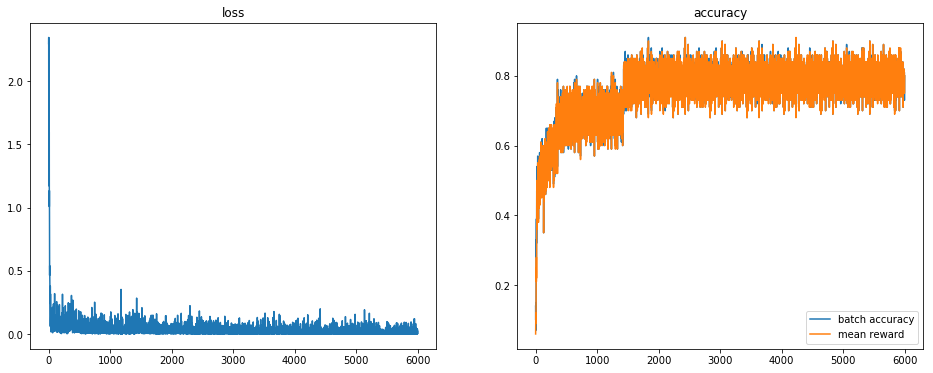

In [9]:
npstats = np.array(stats)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(npstats[:, 0])
plt.title('loss')

plt.subplot(1, 2, 2)
plt.plot(npstats[:, 1])
plt.plot(npstats[:, 2])
plt.legend(['batch accuracy', 'mean reward'])
plt.title('accuracy')

In [10]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(np.mean(y_pred == y_test))

0.7906
